In [1]:
from pathlib import Path
from fastai.vision.all import *
from db.connection import Connection

> TODO: Classify other die types and update training and validation sets

In [2]:
root_dir = Path("./").resolve()
training_data_path = root_dir.joinpath("training-data/train/d4")
validation_data_path = root_dir.joinpath("training-data/valid/d4")

conn = Connection()

In [3]:
def label_func(fname):
    image_classification = conn.get_image_classification(str(fname))
    return image_classification.die_value if image_classification else 0

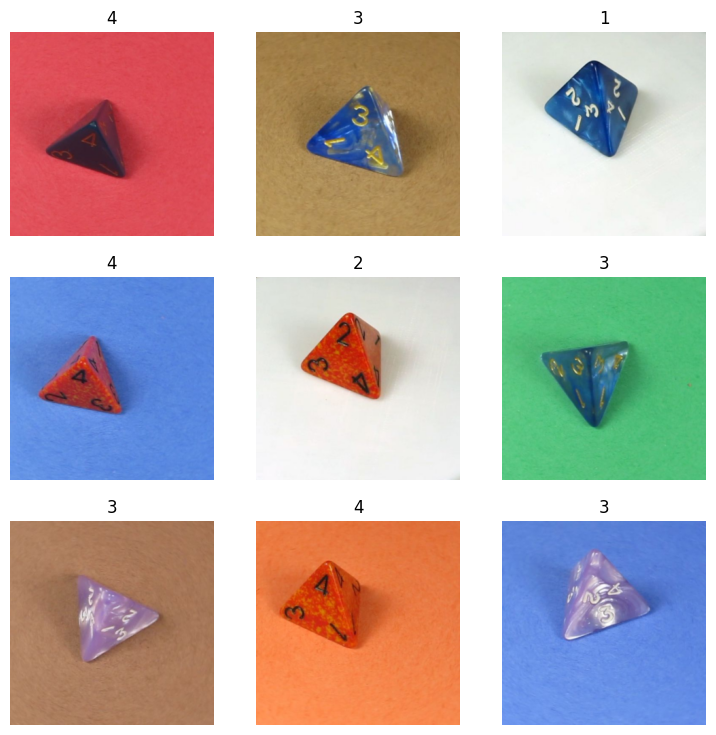

In [4]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=label_func,
    splitter=RandomSplitter(),
    item_tfms=Resize(300),
)
dls = dblock.dataloaders(training_data_path)
dls.show_batch()

In [5]:
learn = Learner(
    dls,
    xresnet50(n_out=dls.c),
    opt_func=ranger,
    loss_func=LabelSmoothingCrossEntropyFlat(),
    metrics=accuracy,
)

In [6]:
learn.fit_flat_cos(5, 8e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.212249,1.035082,0.645244,00:57
1,0.978382,0.708361,0.838046,00:55
2,0.752260,0.428575,0.987147,00:55
3,0.615964,0.443661,0.994859,00:55
4,0.535168,0.383132,1.000000,00:55


In [ ]:
learn.path = root_dir
learn.save("5epoch")

In [13]:
learn.predict('./training-data/valid/d4/d4299.jpg')


('1', tensor(0), tensor([0.9626, 0.0020, 0.0315, 0.0039]))